In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft
from scipy import signal

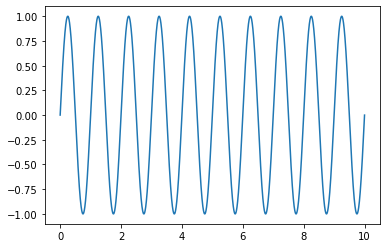

In [2]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 10  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(1, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()


In [3]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone


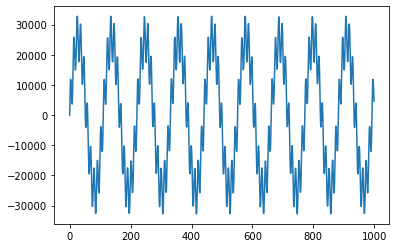

In [4]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()


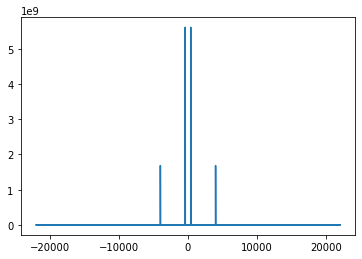

In [8]:
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft.fft(normalized_tone)
xf = fft.fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()



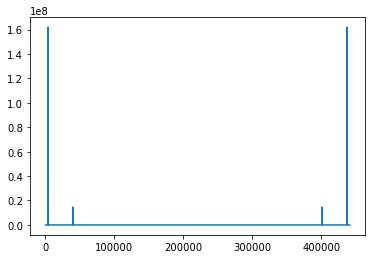

In [20]:
PS = np.abs(yf)**2 / N ** 2
plt.plot(PS)

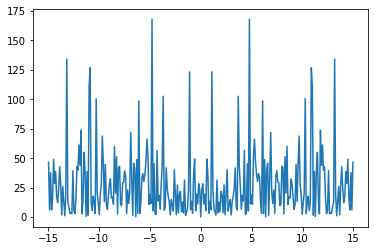

In [9]:
data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 30
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

In [11]:
yf = fft.rfft(data)
power =  np.abs(yf**2)
y_freq = fft.rfftfreq(data.size,time_step)


I need to compare ths scipy fft vs the signal/periodogram method

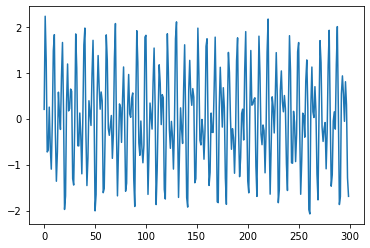

In [32]:
data = np.sin(2*np.pi*4*t) + np.sin(2*np.pi*7*t) + np.random.randn(len(t))*0.2
plt.plot(data)

In [33]:
rate = 30.0
t = np.arange(0, 10, 1/rate)


In [73]:
np.var(data)

1.0759882589774217

In [77]:
#normalisation factor for variance
norm=(2 / len(data))**2

In [79]:
np.sum((np.abs(np.fft.rfft(data))**2)*norm/2)

1.076263058223168

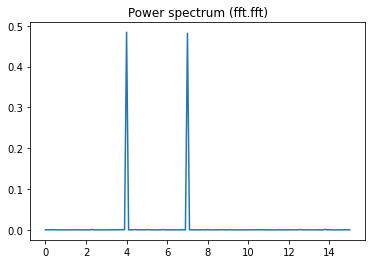

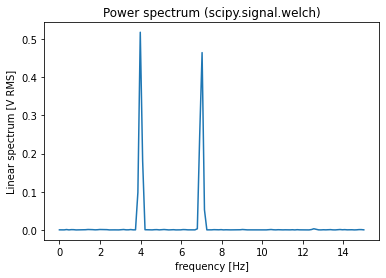

In [49]:
# fft.fft
ps = (((np.abs(np.fft.rfft(data)))**2)*2)
time_step = 1/rate
freq = fft.rfftfreq(data.size,time_step)
plt.plot(freq,ps/np.sum(ps))
plt.title('Power spectrum (fft.fft)')

# signal.welch
f, Pxx_spec = signal.welch(data, rate, window='hanning', return_onesided=True, scaling='spectrum')
plt.figure()
plt.plot(f, (Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
plt.show()

In [54]:
np.var(data)

1.0759882589774217

Text(0.5, 1.0, 'Power spectrum (fft.fft)')

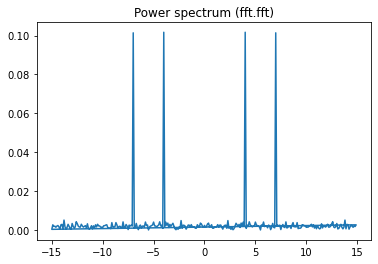

In [59]:
# fft.fft
ps_full = (((np.abs(np.fft.fft(data)))))
time_step = 1/rate
freq_full = fft.fftfreq(data.size,time_step)
plt.plot(freq_full,ps_full/np.sum(ps_full))
plt.title('Power spectrum (fft.fft)')


In [58]:
np.sum(ps_full/np.sum(ps_full))

1.0

The localisation is not great with signal method.

Checking out the 2D FFT code

In [2]:
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [4]:
#read in the data
image = mpimg.imread("clouds.png")


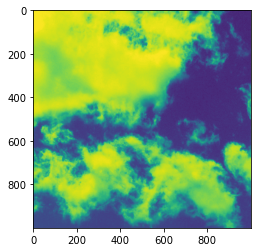

In [5]:
plt.imshow(image)
plt.show()

In [18]:
#read in the pixel resolution
npix = image.shape[0]
resolution = 100

In [6]:
fourier_image = fft.fftn(image)

In [7]:
fourier_amplitudes = np.abs(fourier_image)**2

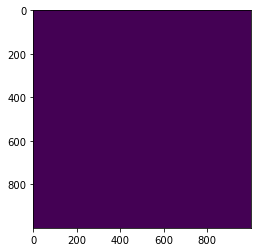

In [16]:
plt.imshow(np.log(np.abs(fft.fftshift(fourier_image))**2))
plt.imshow(fourier_amplitudes)
plt.show()

The output, analogously to fft, contains the term for zero frequency in the low-order corner of all axes, the positive frequency terms in the first half of all axes, the term for the Nyquist frequency in the middle of all axes and the negative frequency terms in the second half of all axes, in order of decreasingly negative frequency.

#### Plotting trial

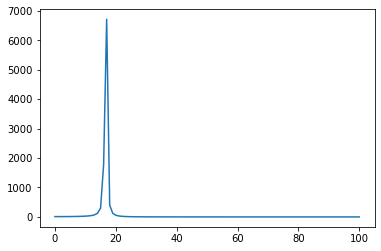

In [19]:
plt.plot(np.abs(fft.rfft(np.sin(2 * np.pi * np.arange(200) / 12)))**2)

In [20]:

rng = np.random.default_rng()

[X, Y] = np.meshgrid(2 * np.pi * np.arange(200) / 12,

                     2 * np.pi * np.arange(200) / 34)

S = np.sin(X) + np.cos(Y) + rng.uniform(0, 1, X.shape)



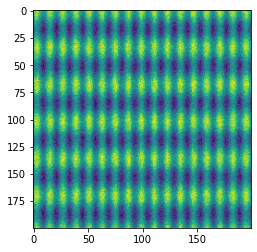

In [21]:
plt.imshow(S)

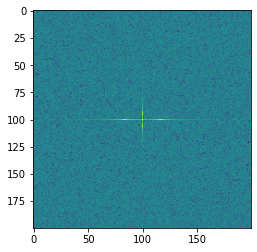

In [22]:
FS = fft.fftn(S)

plt.imshow(np.log(np.abs(fft.fftshift(FS))**2))
#<matplotlib.image.AxesImage object at 0x...>


#### continue

By default, the wave vectors are given as a fraction of 1, by multiplying with the total number of pixels, we convert them to a pixel frequency.

In [23]:
#original code
kfreq = fft.fftfreq(npix) * npix
#modified
#kfreq_sp = fft.fftfreq(npix*resolution,resolution)

To convert this to a two dimensional array matching the layout of the two dimensional Fourier image, we can use

In [24]:
kfreq2D = np.meshgrid(kfreq, kfreq)

Finally, we are not really interested in the actual wave vectors, but rather in their norm:

In [25]:
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

For what follows, we no longer need the wave vector norms or Fourier image to be laid out as a two dimensional array, so we will flatten them:

In [26]:
knrm = knrm.flatten()
fourier_amplitudes = fourier_amplitudes.flatten()

To bin the amplitudes in k space, we need to set up wave number bins. We will create integer k value bins, as is common:

In [27]:
kbins = np.arange(0.5, npix//2+1, 1.)

The kbin array will contain the start and end points of all bins; the corresponding k values are the midpoints of these bins

In [28]:
kvals = 0.5 * (kbins[1:] + kbins[:-1])

To compute the average Fourier amplitude (squared) in each bin, we can use scipy.stats

Remember that we want the total variance within each bin. Right now, we only have the average power. To get the total power, we need to multiply with the volume in each bin (in 2D, this volume is actually a surface area):

In [29]:
Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)

We compute the surface area as the difference between the surface area of two discs with respective radii ku and kl, which are the k values at the lower and the upper edge of the bin.

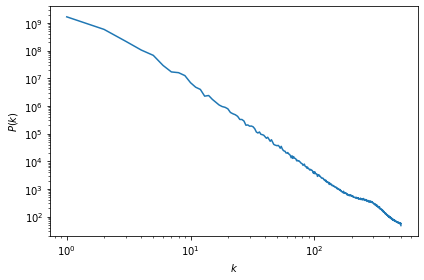

In [31]:
plt.loglog(kvals, Abins)
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.tight_layout()
#pl.savefig("cloud_power_spectrum.png", dpi = 300, bbox_inches = "tight")

I think his spectra is correct, but the wavenumbers are wrong..

In [3]:
>>> from scipy import ndimage
>>> input = [0,1,2,3]
>>> labels = [1,1,2,2]
>>> ndimage.sum(input, labels, index=[1,2])

array([1., 5.])

In [32]:
def GetPSD1D(psd2D):
    h  = psd2D.shape[0]
    w  = psd2D.shape[1]
    wc = w//2
    hc = h//2

    # create an array of integer radial distances from the center
    Y, X = np.ogrid[0:h, 0:w]
    r    = np.hypot(X - wc, Y - hc).astype(int)

    # SUM all psd2D pixels with label 'r' for 0<=r<=wc
    # NOTE: this will miss power contributions in 'corners' r>wc
    psd1D = ndimage.mean(psd2D, r, index=np.arange(0, wc))

    return psd1D

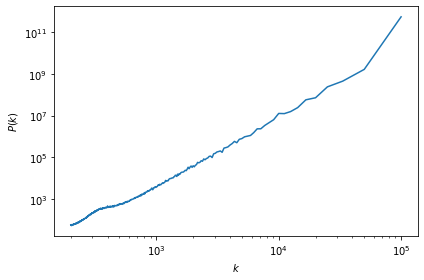

In [36]:
PSD2D = np.abs(fft.fftshift(fourier_image))**2
PSD1D = GetPSD1D(PSD2D)

spatial_scales = (fft.rfftfreq(1000,100))[1:]
plt.loglog(1/spatial_scales, PSD1D)
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.tight_layout()


/tmp/ipykernel_2271627/20931562.py:4: RuntimeWarning: divide by zero encountered in divide
  spatial_scales = (1/fft.rfftfreq(200))[1:]


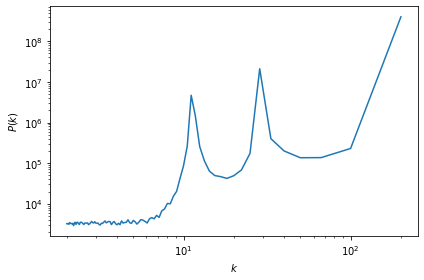

In [39]:

PSD2D = np.abs(fft.fftshift(FS))**2
PSD1D = GetPSD1D(PSD2D)

spatial_scales = (1/fft.rfftfreq(200))[1:]
plt.loglog(spatial_scales, PSD1D)
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.tight_layout()


Check csd calculation

In [40]:
rng = np.random.default_rng()

In [56]:
fs = 10e3

N = 1e5

amp = 20

freq = 1234.0

noise_power = 0.001 * fs / 2

time = np.arange(N) / fs

b, a = signal.butter(2, 0.25, 'low')

x = rng.normal(scale=np.sqrt(noise_power), size=time.shape)

y = signal.lfilter(b, a, x)

x += amp*np.sin(2*np.pi*freq*time)

y += rng.normal(scale=0.1*np.sqrt(noise_power), size=time.shape)

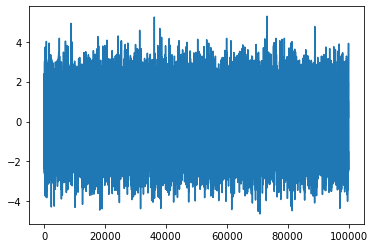

In [43]:
plt.plot(y)

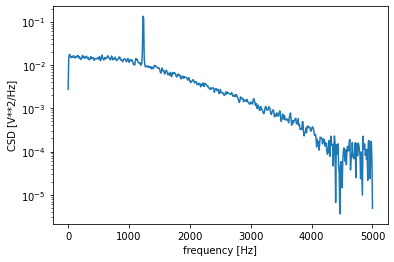

In [61]:
f, Pxy = signal.csd(x, y, fs, nperseg=1024,scaling='spectrum')

plt.semilogy(f, np.abs(Pxy))

plt.xlabel('frequency [Hz]')

plt.ylabel('CSD [V**2/Hz]')

plt.show()

In [52]:
fs = 10e3

N = 1e5

amp = 2*np.sqrt(2)

freq = 1234.0

noise_power = 0.001 * fs / 2

time = np.arange(N) / fs

x = amp*np.sin(2*np.pi*freq*time)

x += rng.normal(scale=np.sqrt(noise_power), size=time.shape)

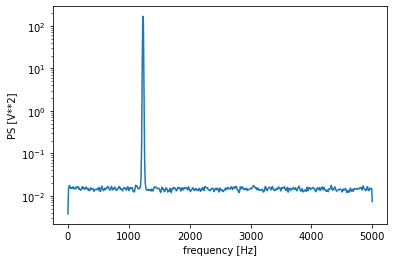

In [62]:
f, Pxx = signal.welch(x, fs, nperseg=1024,scaling='spectrum')

plt.semilogy(f, np.abs(Pxx))

#plt.ylim([0.5e-3, 1])

plt.xlabel('frequency [Hz]')

plt.ylabel('PS [V**2]')

plt.show()

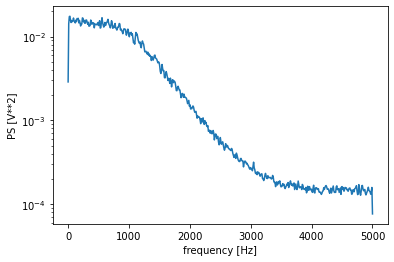

In [63]:
f, Pyy = signal.welch(y, fs, nperseg=1024,scaling='spectrum')

plt.semilogy(f, np.abs(Pyy))

#plt.ylim([0.5e-3, 1])

plt.xlabel('frequency [Hz]')

plt.ylabel('PS [V**2]')

plt.show()

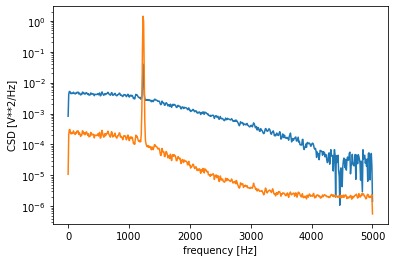

In [83]:
#calculate the conjugates and calculate the cross-spectrum
f, Pxy = signal.csd(x, y, fs, nperseg=1024,scaling='spectrum')

plt.semilogy(f, np.abs(Pxy)/np.sum(Pxy))

plt.xlabel('frequency [Hz]')

plt.ylabel('CSD [V**2/Hz]')

plt.semilogy(f, np.abs(np.conj(Pyy)*(Pxx)))


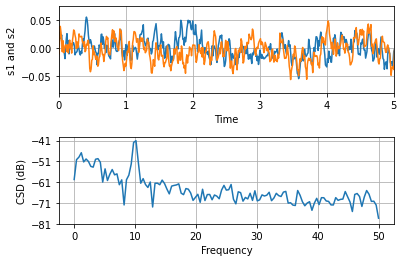

In [87]:
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('Time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (dB)')
plt.show()

In [94]:
np.var(s1)

0.00023392802299006637

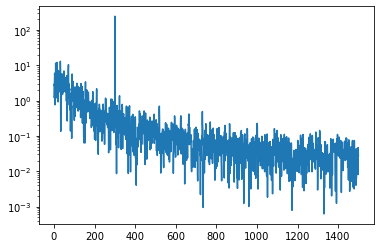

Text(0.5, 0, 'frequency [Hz]')

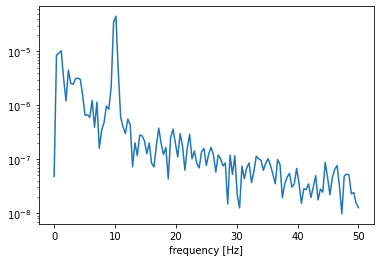

In [93]:
P1 = fft.rfft(s1)
P2 = fft.rfft(s2)

plt.semilogy( np.abs(np.conj(P1)*(P2)))


plt.show()

f, Pxy = signal.csd(s1, s2, fs=1/dt,scaling='spectrum')

plt.semilogy(f, np.abs(Pxy))

plt.xlabel('frequency [Hz]')

# plt.ylabel('CSD [V**2/Hz]')

# plt.semilogy(f, np.abs(np.conj(Pyy)*(Pxx)))